Import the neccessary libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [64]:
try:
    df = pd.read_csv("data.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'data.csv' was not found.")
    exit()

Data loaded successfully.


Data Preprocessing and Feature Engineering

In [65]:
# Rename the columns for easier access
df.columns = ['temperature', 'sales']

# Define the features (X) and target (y)
X = df[["temperature"]] # Features (input to the model)
y = df["sales"] # Target variable (what we want to predict)

Data Splitting

In [66]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Visualization before Training

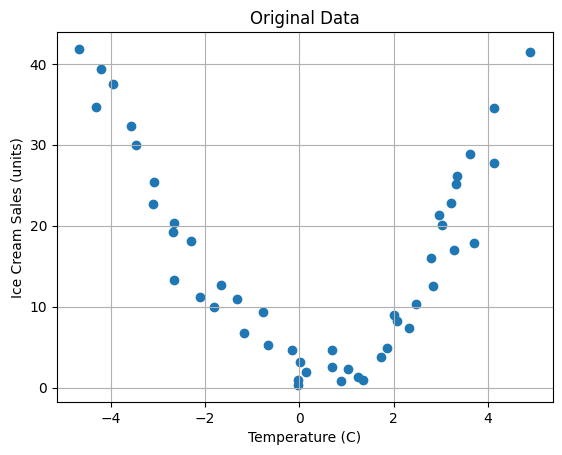

In [67]:
plt.scatter(X,y)
plt.title("Original Data")
plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales (units)")
plt.grid(True)
plt.show()

Model Training

In [68]:
# Train the Linear Regression model........
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
# Make predictions and evaluate for Linear Model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)


# Train the polynominal Regression model.........
# Choose the degree of the polynominal. A degree of 2 seems appropriate for this data
# Because it forms the U shape

degree = 2
poly_features = PolynomialFeatures(degree=degree,include_bias=False)

# Transform the features to include polynominal terms
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Create and train thre polynominal model
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)

# Make predictions and evaluate for polynominal Model
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test,y_pred_poly)
r2_poly = r2_score(y_test,y_pred_poly)

Compare the Models

In [69]:
print("-----Model Performance Comparison-----")
print(f"Linear Regression")
print(f"R-squared: {r2_linear:.4f}")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print("-"*30)
print(f"Polynominal Regression (Degree {degree}):")
print(f"R-squared: {r2_poly:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print("-"*30)

-----Model Performance Comparison-----
Linear Regression
R-squared: -0.5751
Mean Squared Error (MSE): 149.3263
------------------------------
Polynominal Regression (Degree 2):
R-squared: 0.8431
Mean Squared Error (MSE): 14.8788
------------------------------


Visualize the Models

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


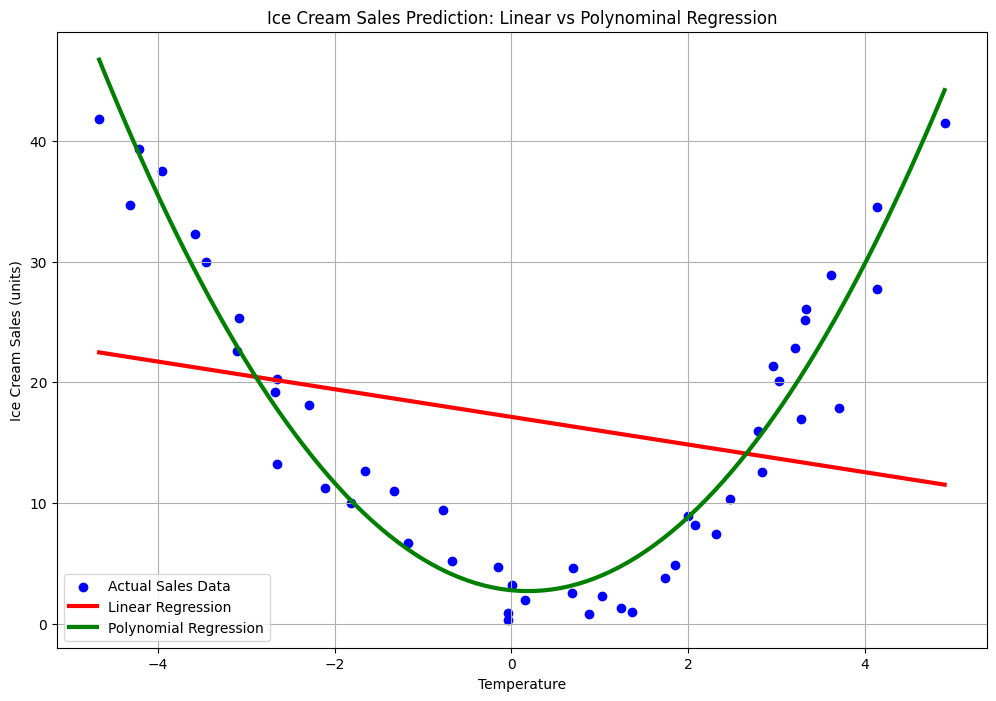

In [70]:
# Create a range of temperature for plotting smooth curves
temp_range = np.linspace(X.min(),X.max(),100).reshape(-1,1)

# Plot the dat and both regression lines
plt.figure(figsize=(12,8))
plt.scatter(X,y,color="blue",label="Actual Sales Data")

# Plot the Linear Regression Line
plt.plot(temp_range,linear_model.predict(temp_range),color="red",lw=3,label="Linear Regression")

# Plot the Regression Curve
temp_range_poly = poly_features.transform(temp_range)
plt.plot(temp_range,poly_model.predict(temp_range_poly),color="green",lw=3,label="Polynomial Regression")

plt.title("Ice Cream Sales Prediction: Linear vs Polynominal Regression")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.grid(True)
plt.show()

Making a new Prediction based on user Choice

In [ ]:
while True:
    try:
        new_temp = float(input("Enter a new temperature to predict ice cream sales:"))
        new_temp_reshaped = np.array([[new_temp]])
        new_temp_poly = poly_features.transform(new_temp_reshaped)
        predicted_sales = poly_model.predict(new_temp_poly)
        print(f"Using the Polynominal Regression model, for a temperature of {new_temp:.2f}, the predicted ice cream sales are: {predicted_sales[0]:.2f} units")
        break # Exit the loop after a successful prediction
    except ValueError:
        print("Invalid input. Please enter a valid number")
        